In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# nltk.download('stopwords')   
# nltk.download('punkt')       
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , mean_squared_error

In [2]:
data=pd.read_csv(r"D:\data\spam.csv")

# EDA

In [3]:
data.sample(5)

,Category,Message
5381,spam,You have 1 new message. Call 0207-083-6089
1887,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1909,ham,Hello beautiful r u ok? I've kinda ad a row wi...
1063,ham,Ok. Not sure what time tho as not sure if can ...


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe(include="object")

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
data.duplicated().sum()

415

In [9]:
data=data.drop_duplicates(keep = 'first')

In [10]:
data.duplicated().sum()

0

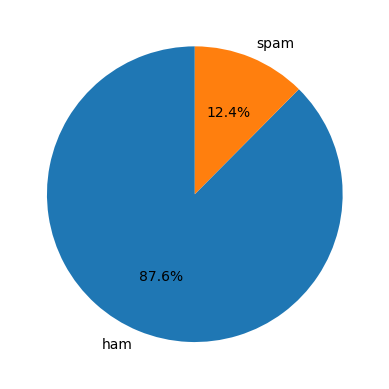

In [18]:
category_counts = data['Category'].value_counts()
mat.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
mat.show()

# Message preprocessing 

In [19]:
lemma= WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    return ' '.join(words)


data['Cleaned_Message'] = data['Message'].apply(preprocess_text)

In [20]:
data.sample(5)

,Category,Message,Cleaned_Message
134,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,sunshine quiz wkly q win top sony dvd player u...
2928,ham,Ok... U enjoy ur shows...,ok u enjoy ur show
502,ham,When can ü come out?,come
4682,ham,Are you staying in town ?,staying town
3652,ham,Want to send me a virtual hug?... I need one,want send virtual hug need one


# TF-IDF Metric

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned_Message'])

#  Category label encoder

In [22]:
label=LabelEncoder()
y=label.fit_transform(data["Category"])

# Splitng the data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# models and evaluation

In [43]:
dic={
"Naive":MultinomialNB(),
"Logistic Regression":LogisticRegression(random_state=0),
"KNN":KNeighborsClassifier(n_neighbors=5),
"Decision Tree":DecisionTreeClassifier(random_state=0,max_depth=8),
"Random Forest":RandomForestClassifier(random_state=0),
"AdaBoost":AdaBoostClassifier(random_state=0),
}

for name ,i in dic.items():
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(name)
    print("# Accuracy --->",  accuracy_score(y_test, y_pred)*100)
    print("# mean_squared_error--->",mean_squared_error(y_test, y_pred))
    print("# classification_report: \n",classification_report(y_test, y_pred))
    print("# confusion_matrix:  \n",confusion_matrix(y_test, y_pred))
    print("***************************************************************")



Naive
# Accuracy ---> 98.15891472868216
# mean_squared_error---> 0.018410852713178296
# classification_report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.87      0.93       136

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032

# confusion_matrix:  
 [[895   1]
 [ 18 118]]
***************************************************************
Logistic Regression
# Accuracy ---> 96.60852713178295
# mean_squared_error---> 0.03391472868217054
# classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.96      0.77      0.86       136

    accuracy                           0.97      1032
   macro avg       0.96      0.88      0.92      1032
weighted avg       0.97      0.97      0.96      103

C:\Users\p&p\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost
# Accuracy ---> 97.38372093023256
# mean_squared_error---> 0.02616279069767442
# classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.93      0.87      0.90       136

    accuracy                           0.97      1032
   macro avg       0.95      0.93      0.94      1032
weighted avg       0.97      0.97      0.97      1032

# confusion_matrix:  
 [[887   9]
 [ 18 118]]
***************************************************************
